###### The latest version of this IPython notebook is available at [http://github.com/jckantor/ESTM60203](http://github.com/jckantor/ESTM60203)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License (CC BY-NC-SA 4.0)](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Production Models with Constraints

This notebook demonstrates the use of linear programming to maximize profit for a simple model of a multiproduct production facility. The notebook uses MathProg/GLPK to represent the model and calculate solutions.

### Initializations

In [1]:
%matplotlib inline
from pylab import *

from IPython.core.display import HTML
HTML(open("styles/custom.css", "r").read())

## Example: Production Plan for a Single Product Plant

Suppose you are thinking about starting up a business to produce Product X. You have determined there is a market for X of up to 40 units per week at a price of \$270 each. The production of each unit requires \$100 of raw materials, 1 hour of type A labor, and 2 hours of type B labor. You have an unlimited amount of raw material available to you, but only 80 hours per week of labor A at a cost of \$50/hour, and 100 hours per week of labor B at a cost of \$40 per hour. Ignoring all other expenses, what is the maximum weekly profit?

To get started on this problem, we sketch a flow diagram illustrating the flow of raw materials and labor through the production plant.

<img src="files/img/LP_ProductX.png" style="width:600px"/>

The essential decision we need to make is how many units or Product X to produce each week. That's our *decision variable* which we denote as $x$. The weekly revenues are then

$$ \mbox{Revenue} = \$270 x $$

The costs include the value of the raw materials and each form of labor. If we produce x units a week, then the total cost is

$$ \mbox{Cost} = \underbrace{\$100 x}_{\mbox{Raw Material}} 
    + \underbrace{\$50 x}_{\mbox{Labor A}} + \underbrace{2\times\$40 x}_{\mbox{Labor B}} = \$230 x$$
    
We see immediately that the gross profit is just

$$\begin{eqnarray*}\mbox{Profit} & = & \mbox{Revenue} - \mbox{Cost} \\
& = & \$270x - \$230x \\
& = & \$40 x
\end{eqnarray*}$$

which means there is a profit earned on each unit of X produced, so let's produce as many as possible. 

There are three constraints that limit how many units can be produced. There is market demand for no more than 40 units per week. Producing $x = 40$ units per week will require 40 hours per week of Labor A, and 80 hours per week of Labor B. Checking those constraints we see that we have enough labor of each type, so the maximum profit will be

$$\max \mbox{Profit} = $40 \mbox{ per unit} \times 40 \mbox{ units per week} = \$1600 \mbox{ per week}$$

What we conclude is that market demand is the 'most constraining constraint.' Once we've made that deduction, the rest is a straightforward problem that can be solved by inspection.  

### MathProg Model

While this problem can be solved by inspection, next we show a `MathProg` model that generates a solution to the problem. The first line is an IPython 'cell magic' that allows us to use the `glpsol` command to read and run a `MathProg` model. The remainder of the cell is the actual model.

In [2]:
%%script glpsol -m /dev/stdin -o /dev/stdout -y display.txt --out output

# Declare decision variables
var x >= 0;

# Declare the objective
maximize Profit: 270*x - 2*40*x - 50*x - 100*x;
    
# Declare problem constraints
subject to Demand: x <= 40;
subject to LaborA: x <= 80;
subject to LaborB: 2*x <= 100;

# Compute a solution
solve;

# Display solution values
printf "Profit = $%7.2f per week\n", Profit;
printf "x = %7.2f units per week\n", x;

end;


This model uses the `printf` statement to display the value of the solution to the model output. The cell magic captures that portion of the model output to a file `display.txt`. That file is prrinted to this notebook with the following command that opens, reads, and prints the contents of the file.

In [3]:
print(open('display.txt').read())

Profit = $1600.00 per week
x =   40.00 units per week



The complete output is displayed as follows.

In [4]:
print output

GLPSOL: GLPK LP/MIP Solver, v4.52
Parameter(s) specified in the command line:
 -m /dev/stdin -o /dev/stdout -y display.txt
Reading model section from /dev/stdin...
20 lines were read
Generating Profit...
Generating Demand...
Generating LaborA...
Generating LaborB...
Model has been successfully generated
GLPK Simplex Optimizer, v4.52
4 rows, 1 column, 4 non-zeros
Preprocessing...
~     0: obj =   1.600000000e+03  infeas =  0.000e+00
OPTIMAL SOLUTION FOUND BY LP PREPROCESSOR
Time used:   0.0 secs
Memory used: 0.1 Mb (94198 bytes)
Model has been successfully processed
Writing basic solution to `/dev/stdout'...
Problem:    stdin
Rows:       4
Columns:    1
Non-zeros:  4
Status:     OPTIMAL
Objective:  Profit = 1600 (MAXimum)

   No.   Row name   St   Activity     Lower bound   Upper bound    Marginal
------ ------------ -- ------------- ------------- ------------- -------------
     1 Profit       B           1600                             
     2 Demand       NU            40           

### Exercises

Open a web browswer to the `MathProg` page http://www3.nd.edu/~jeff/mathprog/mathprog.html. Cut and paste the above model into the edit window of the `MathProg` web page, and clear on the `Solve` button to execute the model. Navigate thought the various tabs to see what's going on. Then change some of the model parameters to try some 'what-if' questions:

1. Suppose the demand could be increased to 50 units per month. What would be the increased profits?  What if the demand increased to 60 units per month?  How much would you be willing to pay for your marketing department for the increased demand?

2. Increase the cost of LaborB. At what point is it no longer financially viable to run the plant?


## Production Plan: Product Y

Your marketing department has developed plans for a new product called Y. The product sells at a price of \$210/each, and they expect that you can sell all that you can make. It's also cheaper to make, requiring only \$90 in raw materials, 1 hour of Labor type A at \$50 per hour, and 1 hour of Labor B at \$40 per hour. What is the potential weekly profit?

<img src="files/img/LP_ProductY.png" style="width:600px"/>

In [5]:
%%script glpsol -m /dev/stdin -o /dev/stdout -y display.txt --out output

# Declare decision variables
var y >= 0;

# Declare the objective
maximize Profit: 210*y - 40*y - 50*y - 90*y;
    
# Declare problem constraints
subject to LaborA: y <= 80;
subject to LaborB: y <= 100;

# Compute a solution
solve;

# Display solution values
printf "Profit = $%7.2f per week\n", Profit;
printf "y = %7.2f units per week\n", y;

end;


Looking at the model output

In [6]:
print(open('display.txt').read())

Profit = $2400.00 per week
y =   80.00 units per week



Compared to product X, we can manufacture and sell up 80 units per week for a total profit of \$2,400. This is very welcome news. 

### Exercises

Again, cut and paste the model for the production of Y into the MathProg web solver. Then attempt to answer these questions:

1. What is the limiting resource?  That is, which of the two types of labor limits the capacity of your plant to produce more units of Y?

2. What rate would you be willing to pay for the additional labor necessary to increase the production of Y?

## Production Plan: Mixed Product Strategy

So far we have learned that we can make \$1,600 per week by manufacturing product X, and $2,400 per week manufacturing product Y.  Is it possible to do even better?

To answer this question, we consider the possibilty of manufacturing both products in the same plant. The marketing department assures us that product Y will not affect the sales of product X.  So the same constraints hold as before, but now we have two decision variables, $x$ and $y$.

<img src="files/img/LP_ProductXY.png" style="width:600px"/>

In [7]:
%%script glpsol -m /dev/stdin -o /dev/stdout -y display.txt --out output

# Declare decision variables
var x >= 0;
var y >= 0;

# Declare the objective
maximize Profit: (270*x - 2*x*40 - 50*x - 100*x) 
    + (210*y - 40*y - 50*y - 90*y);
    
# Declare problem constraints
subject to Demand: x <= 40;
subject to LaborA: x + y <= 80;
subject to LaborB: 2*x + y <= 100;

# Compute a solution
solve;

# Display solution values
printf "Profit = $%7.2f per week\n", Profit;
printf "x = %7.2f units per week\n", x;
printf "y = %7.2f units per week\n", y;

end;


Let's see how we do

In [8]:
print(open('display.txt').read())

Profit = $2600.00 per week
x =   20.00 units per week
y =   60.00 units per week



The mixed product strategy earns more profit than either of the single product srategies. Does this surprise you?  Before going further, try to explain why it is possible for a mixed product strategy to earn more profit than either of the possible single product strategies.

## What are the active constraints?

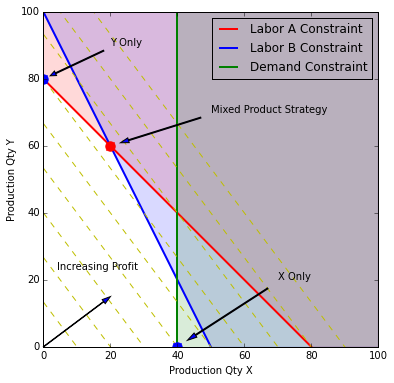

In [9]:
figure(figsize=(6,6))
subplot(111, aspect='equal')
axis([0,100,0,100])
xlabel('Production Qty X')
ylabel('Production Qty Y')

# Labor A constraint
x = array([0,80])
y = 80 - x
plot(x,y,'r',lw=2)
fill_between([0,80,100],[80,0,0],[100,100,100],color='r',alpha=0.15)

# Labor B constraint
x = array([0,50])
y = 100 - 2*x
plot(x,y,'b',lw=2)
fill_between([0,50,100],[100,0,0],[100,100,100],color='b',alpha=0.15)

# Demand constraint
plot([40,40],[0,100],'g',lw=2)
fill_between([40,100],[0,0],[100,100],color='g',alpha=0.15)

legend(['Labor A Constraint','Labor B Constraint','Demand Constraint'])

# Contours of constant profit
x = array([0,100])
for p in linspace(0,3600,10):
    y = (p - 40*x)/30
    plot(x,y,'y--')

# Optimum
plot(20,60,'r.',ms=20)
annotate('Mixed Product Strategy', xy=(20,60), xytext=(50,70),
         arrowprops=dict(shrink=.1,width=1,headwidth=5))

plot(0,80,'b.',ms=20)
annotate('Y Only', xy=(0,80), xytext=(20,90),
         arrowprops=dict(shrink=0.1,width=1,headwidth=5))

plot(40,0,'b.',ms=20)
annotate('X Only', xy=(40,0), xytext=(70,20),
         arrowprops=dict(shrink=0.1,width=1,headwidth=5))

text(4,23,'Increasing Profit')
annotate('', xy=(20,15), xytext=(0,0),
         arrowprops=dict(width=0.5,headwidth=5))

savefig('img/LPprob01.png',bbox_inches='tight')

## What is the incremental value of labor?

In [10]:
%%script glpsol -m /dev/stdin -o /dev/stdout -y display.txt --out output

# Declare decision variables
var x >= 0;
var y >= 0;

# Declare the objective
maximize Profit: (270*x - 2*x*40 - 50*x - 100*x) 
    + (210*y - 40*y - 50*y - 90*y);
    
# Declare problem constraints
subject to Demand: x <= 40;
subject to LaborA: x + y <= 80;
subject to LaborB: 2*x + y <= 100;

# Compute a solution
solve;

# Display solution values
printf "Profit = $%7.2f per week\n\n", Profit;
printf "x = %7.2f units per week\n", x;
printf "y = %7.2f units per week\n\n", y;

printf "Demand = %7.2f units        %7.2f\n", Demand, Demand.dual;
printf "LaborA = %7.2f hours        %7.2f\n", LaborA, LaborA.dual;
printf "LaborB = %7.2f hours        %7.2f\n", LaborB, LaborB.dual;
end;


In [11]:
print(open('display.txt').read())

Profit = $2600.00 per week

x =   20.00 units per week
y =   60.00 units per week

Demand =   20.00 units           0.00
LaborA =   80.00 hours          20.00
LaborB =  100.00 hours          10.00



## Theory of Constraints

* For $n$ decisions you should expect to find $n$ 'active' constraints.
* Each inactive constraint has an associated 'slack.'  The associated resources have no incremental value.
* Each active constraint has an associated 'shadow price'.  This is additional value of additional resources.

## Exercises

1. Copy and paste these models into the [MathProg](http://www3.nd.edu/~jeff/mathprog/) solver. Verify the calculations and conclusions shown above.